# Part I - Data Visualization

In this part, we made a few plots to visualize basic information in the datasets. Our main focus is the relationship between salary and other indicators. We'd like to find out how and in which aspects would salary level affect people's choice and comment on companies or sectors.

This part is organized as follow:

1. We will guse simple functions to get to know our dataset.
2. We will draw histograph and wordcloud to get general information of our dataset.
3. We will simply take different indicators to visualize their relationship on salary.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
# loading data 
df = pd.read_csv('FinalData.csv') # Dataset
td = pd.read_csv('TestData.csv')  # Smaller dataset

In [4]:
print(df.shape)
df.head()

(22337, 20)


,employmentStatus,jobTitle,max,mean,min,payPeriod,company_name,totalJobTitlesCount,careerOpportunitiesRating,compensationAndBenefitsRating,cultureAndValuesRating,industryName,isEEP,numberOfRatings,overallRating,ratingDescription,recommendToFriendRating,sectorName,seniorLeadershipRating,workLifeBalanceRating
0,REGULAR,Cyber Security Consultant,136050.20,130255.78,124461.35,ANNUAL,Accenture,1,3.7,3.4,3.9,Consulting,True,52510,3.8,Satisfied,78,Business Services,3.2,3.5
1,REGULAR,Data Scientist Consultant,123192.80,112439.25,102154.79,ANNUAL,Accenture,1,3.7,3.4,3.9,Consulting,True,52510,3.8,Satisfied,78,Business Services,3.2,3.5
2,REGULAR,Technical Support Analyst,65163.48,55190.95,47036.82,ANNUAL,Accenture,3,3.7,3.4,3.9,Consulting,True,52510,3.8,Satisfied,78,Business Services,3.2,3.5
3,REGULAR,Technical Support Analyst,21.21,19.90,18.58,HOURLY,Accenture,3,3.7,3.4,3.9,Consulting,True,52510,3.8,Satisfied,78,Business Services,3.2,3.5
4,CONTRACT,Technical Support Analyst,20.14,19.34,18.53,HOURLY,Accenture,3,3.7,3.4,3.9,Consulting,True,52510,3.8,Satisfied,78,Business Services,3.2,3.5


## Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22337 entries, 0 to 22336
Data columns (total 20 columns):
employmentStatus                 22337 non-null object
jobTitle                         22337 non-null object
max                              22337 non-null float64
mean                             22337 non-null float64
min                              22337 non-null float64
payPeriod                        22337 non-null object
company_name                     22337 non-null object
totalJobTitlesCount              22337 non-null int64
careerOpportunitiesRating        22337 non-null float64
compensationAndBenefitsRating    22337 non-null float64
cultureAndValuesRating           22337 non-null float64
industryName                     20212 non-null object
isEEP                            22337 non-null bool
numberOfRatings                  22337 non-null int64
overallRating                    22337 non-null float64
ratingDescription                22337 non-null object
recommen

In [6]:
# Show all numeric columns
df.describe(include=[np.number])

,max,mean,min,totalJobTitlesCount,careerOpportunitiesRating,compensationAndBenefitsRating,cultureAndValuesRating,numberOfRatings,overallRating,recommendToFriendRating,seniorLeadershipRating,workLifeBalanceRating
count,22337.000000,22337.000000,22337.000000,22337.000000,22337.000000,22337.000000,22337.000000,22337.000000,22337.000000,22337.000000,22337.000000,22337.000000
mean,87499.100837,74270.228835,63285.850934,59.931504,3.322098,3.431862,3.508578,9316.811926,3.535036,66.727090,3.063348,3.474858
std,65372.831271,54456.974042,47845.918294,253.825412,0.802632,0.829498,0.860571,14055.396801,0.788219,20.916799,0.871217,0.817541
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,0.000000
25%,35646.430000,32531.240000,25941.040000,2.000000,3.100000,3.200000,3.300000,114.000000,3.400000,59.000000,2.900000,3.300000
50%,89441.570000,77120.330000,64021.160000,5.000000,3.500000,3.600000,3.700000,2047.000000,3.700000,71.000000,3.200000,3.600000
75%,133083.220000,112338.250000,94952.300000,17.000000,3.800000,3.900000,4.000000,14174.000000,3.900000,79.000000,3.500000,3.900000
max,613880.310000,530379.310000,464437.090000,5423.000000,5.000000,5.000000,5.000000,52510.000000,5.000000,100.000000,5.000000,5.000000


In [7]:
# Show all "object" dtype columns
df.describe(include=['O'])

,employmentStatus,jobTitle,payPeriod,company_name,industryName,ratingDescription,sectorName
count,22337,22337,22337,22337,20212,22337,20212
unique,4,6472,3,2300,118,6,25
top,REGULAR,Software Engineer,ANNUAL,IBM,Computer Hardware & Software,Satisfied,Information Technology
freq,19919,420,16970,773,3316,12661,8203


In [8]:
df.columns

Index(['employmentStatus', 'jobTitle', 'max', 'mean', 'min', 'payPeriod',
       'company_name', 'totalJobTitlesCount', 'careerOpportunitiesRating',
       'compensationAndBenefitsRating', 'cultureAndValuesRating',
       'industryName', 'isEEP', 'numberOfRatings', 'overallRating',
       'ratingDescription', 'recommendToFriendRating', 'sectorName',
       'seniorLeadershipRating', 'workLifeBalanceRating'],
      dtype='object')

In [9]:
# Show all null values in descending order
df.isnull().sum().sort_values(ascending=False)

sectorName                       2125
industryName                     2125
workLifeBalanceRating               0
careerOpportunitiesRating           0
jobTitle                            0
max                                 0
mean                                0
min                                 0
payPeriod                           0
company_name                        0
totalJobTitlesCount                 0
compensationAndBenefitsRating       0
seniorLeadershipRating              0
cultureAndValuesRating              0
isEEP                               0
numberOfRatings                     0
overallRating                       0
ratingDescription                   0
recommendToFriendRating             0
employmentStatus                    0
dtype: int64

In [10]:
df['employmentStatus'].value_counts()

REGULAR     19919
INTERN       1246
CONTRACT     1171
TRAINEE         1
Name: employmentStatus, dtype: int64

In [11]:
df['ratingDescription'].value_counts()

Satisfied            12661
OK                    5371
Very Satisfied        3113
Not Applicable         638
Dissatisfied           511
Very Dissatisfied       43
Name: ratingDescription, dtype: int64

## Histograph on basic information

In [31]:
df1 = df.groupby('sectorName')['overallRating'].describe()
df1

,count,mean,std,min,25%,50%,75%,max
sectorName,,,,,,,,
Accounting & Legal,601.0,3.663894,0.510598,0.0,3.700,3.8,3.80,5.0
Aerospace & Defense,276.0,3.543478,0.301139,2.2,3.600,3.6,3.60,4.2
Agriculture & Forestry,11.0,2.636364,2.180492,0.0,0.000,3.5,4.25,5.0
"Arts, Entertainment & Recreation",67.0,3.541791,0.829229,0.0,3.300,3.5,3.90,5.0
Biotech & Pharmaceuticals,866.0,3.525866,0.413837,1.5,3.400,3.6,3.80,4.6
Business Services,2395.0,3.496785,0.580138,0.0,3.200,3.5,3.80,5.0
"Construction, Repair & Maintenance",111.0,3.463964,1.051475,0.0,3.200,3.5,4.00,5.0
Consumer Services,34.0,3.194118,1.012031,0.0,3.025,3.2,3.60,5.0
Education,258.0,3.713953,0.655446,0.0,3.500,3.8,4.10,5.0


In [32]:
df2 = df1['mean']
df2 = df2.sort_values()

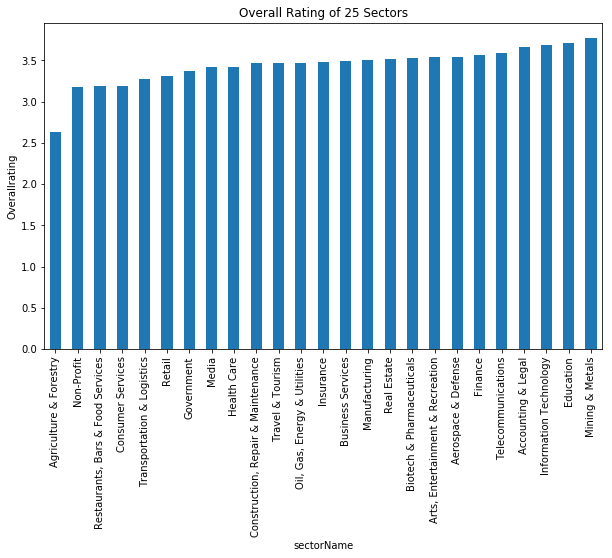

In [33]:
df2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('sectorName') 
plt.ylabel('Overallrating')
plt.title('Overall Rating of 25 Sectors')

plt.show()

The bar graph above shows overall rating for the total 25 sectors. One conclusion we can make from it is that the rating for different sector is close and the score of Agriculture & Forestry is only 2.6 which is aparently lower than those of others.

In [35]:
an_salary = df[df['payPeriod'] == 'ANNUAL']
df3 = an_salary.groupby('sectorName')['mean'].describe()
df4 = df3['mean']

In [ ]:
an_salary = fd[fd['payPeriod'] == 'ANNUAL']
df3 = an_salary.groupby('sectorName')['mean'].describe()
df4 = df3['mean']

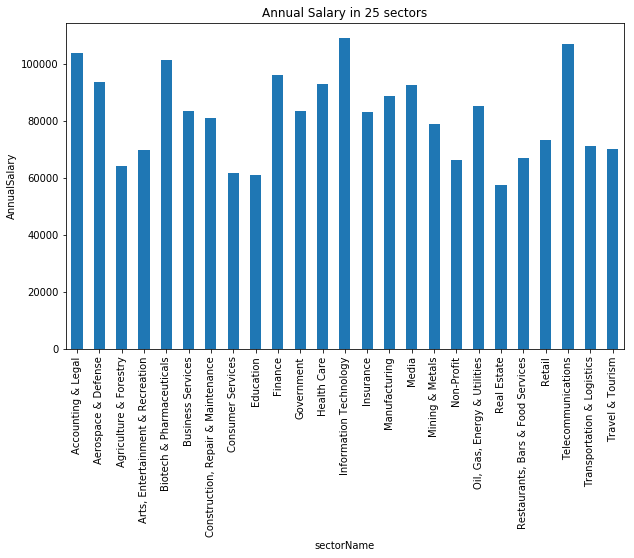

In [36]:
df4.plot(kind='bar', figsize=(10, 6))

plt.xlabel('sectorName') 
plt.ylabel('AnnualSalary')
plt.title('Annual Salary in 25 sectors')

plt.show()

In [38]:
hr_salary = df[df['payPeriod'] == 'HOURLY']
df5= hr_salary.groupby('sectorName')['mean'].describe()
df6 = df5['mean']

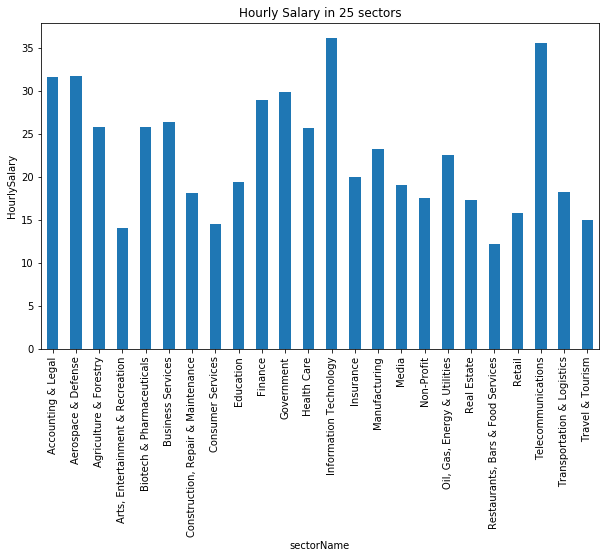

In [39]:
df6.plot(kind='bar', figsize=(10, 6))

plt.xlabel('sectorName') 
plt.ylabel('HourlySalary')
plt.title('Hourly Salary in 25 sectors')

plt.show()

Based on the two graphs above, it can be easily concluded that the distribution of average annual salary and hourly salary are highly similar. But we can also notice that in Restaurant, Bars & Food Service, the annual salary is high while the hourly salary is low, and the exact opposite is true in Agriculture & Forestry. According to our analysis, the reason for this phenomenon is the difference between the average working hours in these two sectors. 

## Wordcloud on sectors

In this part we make a wordcloud to see the most heated sectors contemporarily.

In [42]:
!pip install wordcloud

In [43]:
from wordcloud import WordCloud, STOPWORDS

In [44]:
word = df['sectorName']
word=word.dropna()
wc = []
for w in word:
    w_s = str(w)
    wc.append(w_s)

In [45]:
def all_list(arr):
    result = {}
    for i in set(arr):
        result[i] = arr.count(i)
    return result

In [46]:
word_freq = all_list(wc)

In [47]:
wordcloud = WordCloud(background_color='white',
                      width = 2000,
                      height = 1000,
                      scale = 5,
                      relative_scaling = 0.1,
                     ).generate_from_frequencies(word_freq)

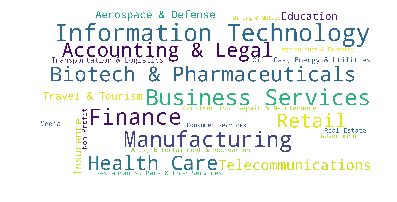

In [48]:
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud.jpg",dpi=1000)
plt.show()

## Visulize effect on salaries by different categories

In [52]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14,6))
    plt.subplot(1,2,1)
    if df[col].dtype == 'int64' or 'float64':
        df[col].value_counts().sort_index().plot()
    else:
        # change the categorical variables to category type and order their level by the mean of salary
        mean = df.groupby(col)['mean'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1,2,2)
    
    if df[col].dtype == 'int64'or col =='CompanyId':
        # plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['mean'].mean()
        std = df.groupby(col)['mean'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values - std.values, mean.values + std.values, alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'mean', data=df)
        
    plt.xticks(rotation=45)
    plt.ylabel('Mean Salaries')
    plt.show()

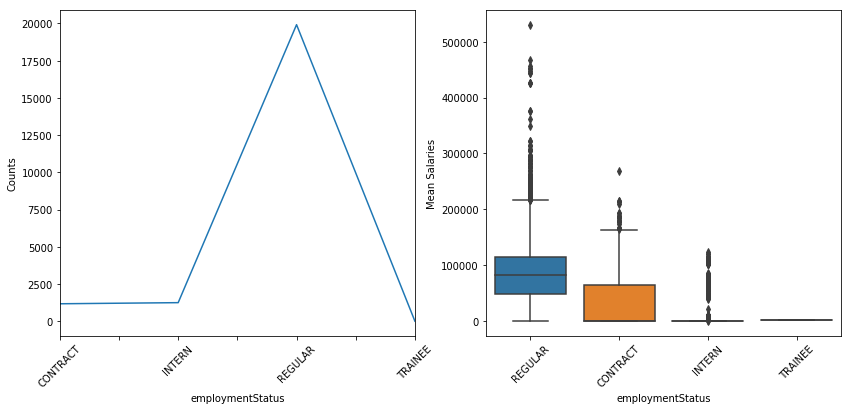

In [53]:
plot_feature(df, 'employmentStatus')

A negative correlation shows the better employment status the higher salary

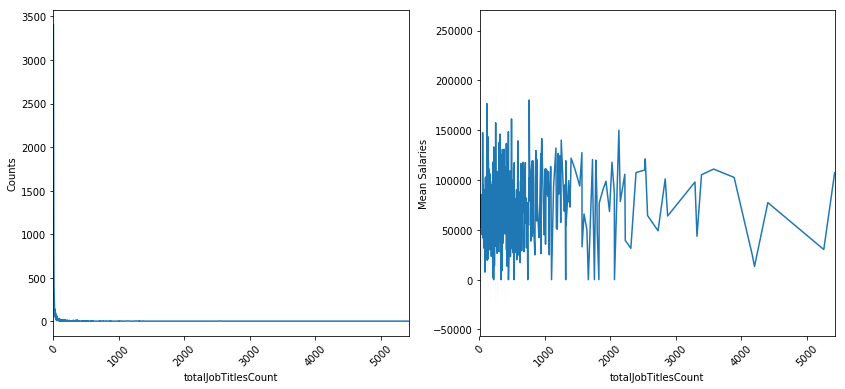

In [54]:
plot_feature(df, 'totalJobTitlesCount')

This line chart shows the total number of job title does not correlated to the Mean salary

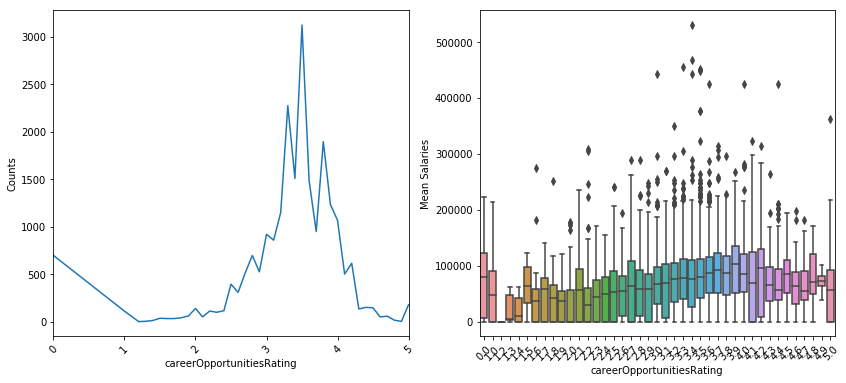

In [55]:
plot_feature(df, 'careerOpportunitiesRating')

There is a positive association between Career Oppurtunities Rating and Mean salary. 

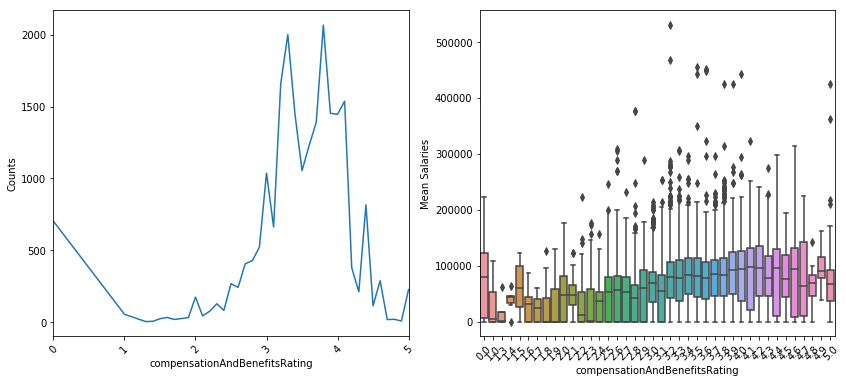

In [56]:
plot_feature(df, 'compensationAndBenefitsRating')

Positive correlation between compensationAndBenefitsRating and mean salary

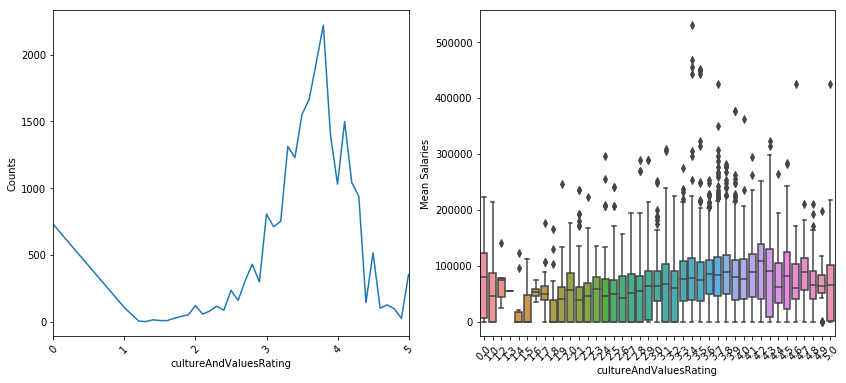

In [57]:
plot_feature(df, 'cultureAndValuesRating')

Positive correlation between cultureAndValuesRating and mean salary

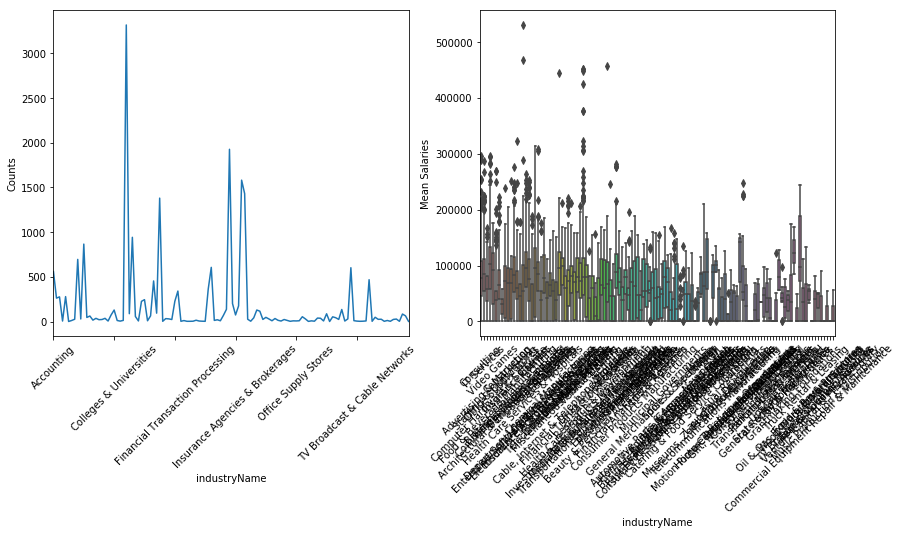

In [58]:
plot_feature(df, 'industryName')

Some industries generally have higher salaries

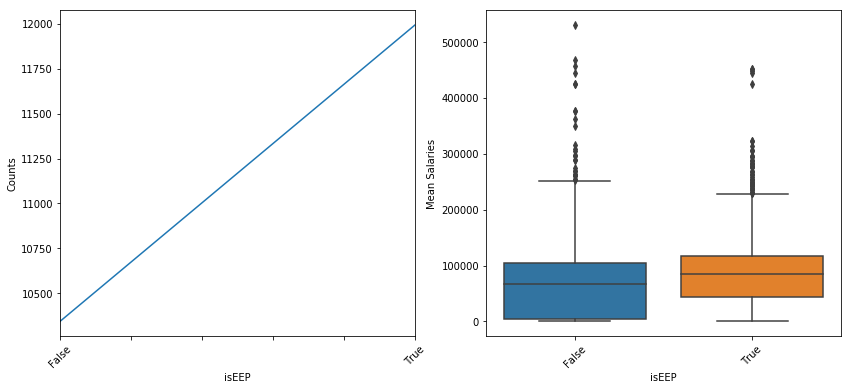

In [59]:
plot_feature(df, 'isEEP')

There is no significant difference on Mean salary between if it is isEEP

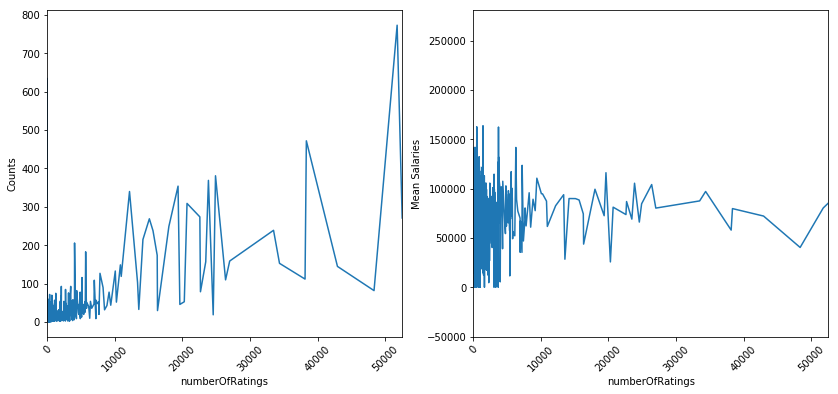

In [60]:
plot_feature(df, 'numberOfRatings')

No significant correlation shows between numberofratings and Mean salaries

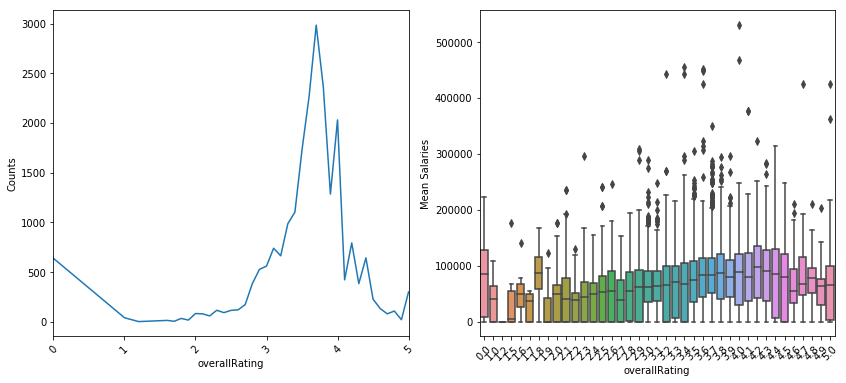

In [61]:
plot_feature(df, 'overallRating')

Positive correlation between overallRating and mean salary

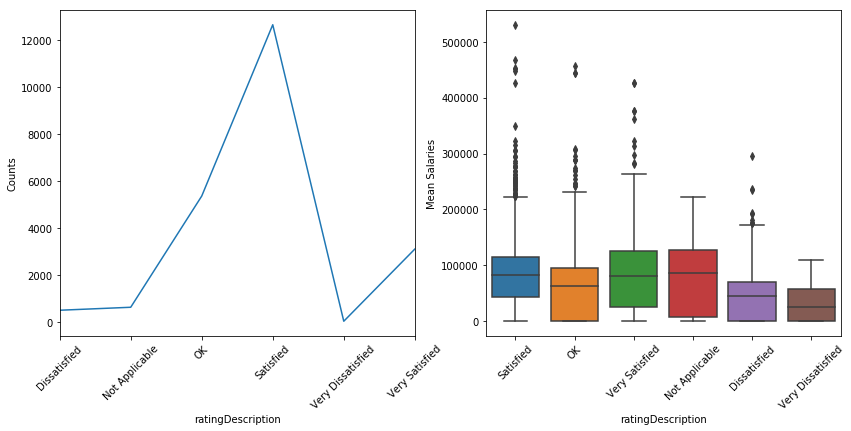

In [62]:
plot_feature(df, 'ratingDescription')

The more satified employee have higher salary

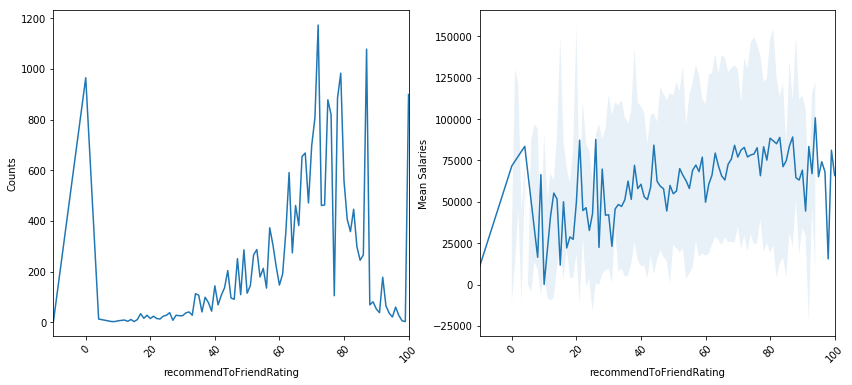

In [63]:
plot_feature(df, 'recommendToFriendRating')

No correlation shows between recommendToFriendRating and Mean salaries

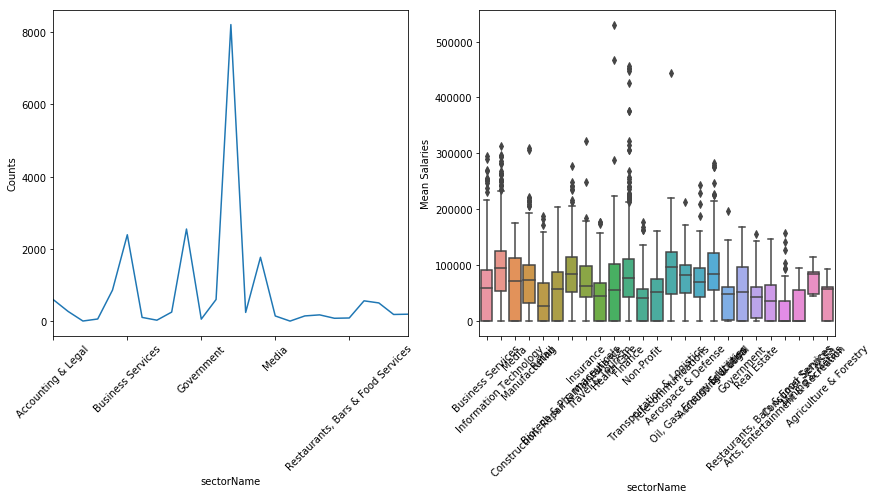

In [64]:
plot_feature(df, 'sectorName')

There is an association between sectorname and mean salary

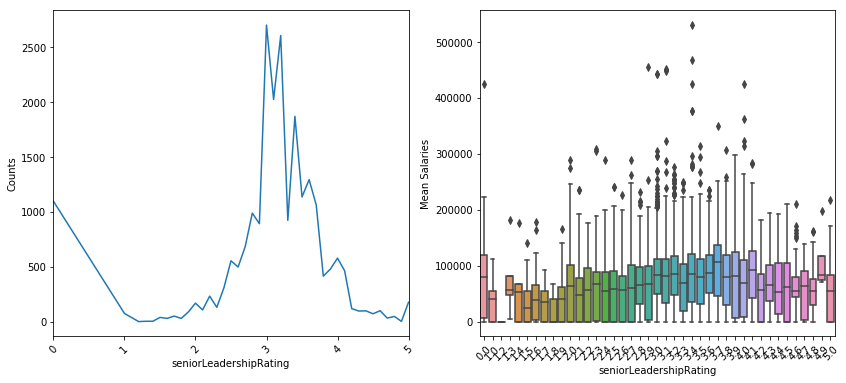

In [65]:
plot_feature(df, 'seniorLeadershipRating')

There is an association between sectorname and mean salary

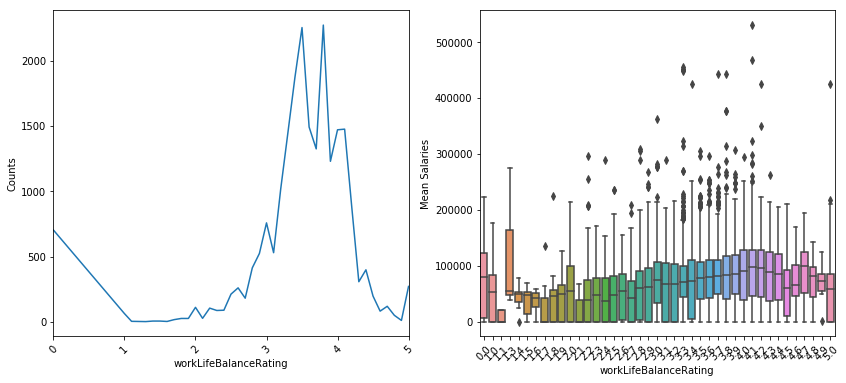

In [66]:
plot_feature(df, 'workLifeBalanceRating')

There is an association between sectorname and mean salary

From above visualizations, the following variables has association with our target variable (salary):
    1. employmentStatus
    2. careerOpportunitiesRating
    3. compensationAndBenefitsRating
    4. cultureAndValuesRating
    5. industryName
    6. overallRating
    7. ratingDescription
    8. sectorName
    9. seniorLeadershipRating
    10. workLifeBalanceRating

#### In another jupyter notebook "Data_Exploration_Final.ipynb", we will do more research on the relationship between salary and other indicators, especially ratings, to find out whether salary level plays an important role in ratings of different companies.